# PRÁCTICA 9 - Modelo de Preferential Attachment

**Objetivo**
El objetivo de esta práctica es implementar el modelo de preferential attachement propuesto por Barabási y Albert, y estudiar su distribución de grado


## 1 Preferential Attachment model (1999)
- 1.1. Implementar en una función de python el algoritmo de generación de una red   Preferential Attachment propuesto por Barabasi y Albert (1999) de parámetros PA(N,mo,m): 
    - We start with m0 nodes, the links between which are chosen arbitrarily, as long as each node has at least one link. The network develops following two steps (for N-mo times) :
        - Growth: At each timestep we add a new node with m (≤ m0) links that connect the new node to m nodes already in the network.
        - Preferential attachment: The probability Π(k) that a link of the new node connects to node i depends on the degree ki as:

- Tener en cuenta:
    - Recordar que una forma sencilla de implementar el proceso de selección aleatorio de los nodos existentes con probabilidad proporcional a su grado es mantener una lista con las keys de los nodos, repetidas tantas veces como su grado, y escoger un nodo aleatorio en dicha lista (ver la presentación de clase).
    - Evitar crear enlaces múltiples, si escogemos un nodo con el que ya tenemos creado un enlace, volvemos a repetir el proceso.


In [31]:
# Imports
import matplotlib.pyplot as plt
import networkx as nx
import random
import numpy as np # librería de computación numérica
import scipy.stats

In [32]:
def PA(N, m0, m):
    # Comienza con m0 nodos y crea enlaces arbitrarios entre ellos
    G = nx.complete_graph(m0)

    # Lista de nodos, donde cada nodo aparece en la lista tantas veces como su grado
    visitados = list(G.nodes) * m0

    for i in range(m0, N):
        # Añade un nuevo nodo con m enlaces
        G.add_node(i)

        # Selecciona m nodos aleatoriamente de la lista de nodos
        # Evita crear enlaces múltiples
        enlaces = set()
        while len(enlaces) < m:
            node = random.choice(visitados)
            if not G.has_edge(i, node):
                enlaces.add(node)

        # Añade los enlaces al grafo
        G.add_edges_from((i, node) for node in enlaces)

        # Añade el nuevo nodo a la lista de nodos m veces
        visitados.extend(enlaces)
        visitados.extend([i] * m)

    return G

## 2 Distribución de grado
- 2.1 Represente la distribución de grado de una realización de 1000 nodos del modelo modelo PA(N=1000,mo=3, m=2). Recuerde la función: matplotlib.pyplot.hist()

- 2.2 (Opcional) Estime mediante el método que quiera el parámetro de la distribución power-law del grado (recuerde los resultados de la práctica de distribuciones de potencia)


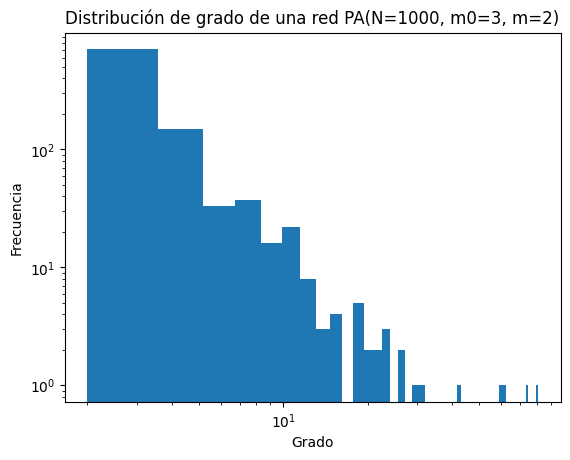

In [33]:
#2.1 Generar un grafo de 1000 nodos con m0=3 y m=3

# Genera una red utilizando el modelo PA
G = PA(N=1000, m0=3, m=2)

# Obtiene los grados de todos los nodos en la red
grados = [grado for nodo, grado in G.degree()]

# Dibuja el histograma de la distribución de grado
plt.hist(grados, bins=50)
plt.yscale('log')
plt.xscale('log')
plt.xlabel('Grado')
plt.ylabel('Frecuencia')
plt.title('Distribución de grado de una red PA(N=1000, m0=3, m=2)')
plt.show()

Coeficiente α: -2.8509003449999293
Valor de R^2: 0.9989561486466743
P-valor: 1.4318018138936512e-05


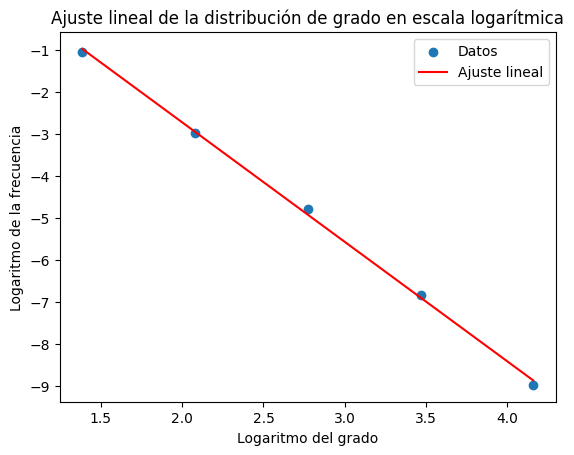

In [34]:
# 2.2. Estimación del parámetero de la distribución Power-Law del grado

# Obtenemos los grados de todos los nodos en la red
grados = [grado for nodo, grado in G.degree()]

# Definimos las clases en una escala logarítmica
bins = 2**np.arange(1, np.log2(np.max(grados)))

# Calculamos las frecuencias
frecuencias, bins = np.histogram(grados, bins=bins, density=True)

# Calculamos los logaritmos de los grados y las frecuencias
log_bins = np.log(bins[1:])
log_frecuencias = np.log(frecuencias + 1e-10)  # Agrega un pequeño valor para evitar tomar el logaritmo de cero

# Calculamos la regresión lineal
slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(log_bins, log_frecuencias)

# Imprimimos los resultados
print(f"Coeficiente α: {slope}")
print(f"Valor de R^2: {r_value**2}")
print(f"P-valor: {p_value}")

# Dibujamos los datos
plt.scatter(log_bins, log_frecuencias, label='Datos')

# Dibujamos la línea de regresión
x = np.linspace(min(log_bins), max(log_bins), 100)
y = slope * x + intercept
plt.plot(x, y, color='red', label='Ajuste lineal')

# Etiquetas y título
plt.xlabel('Logaritmo del grado')
plt.ylabel('Logaritmo de la frecuencia')
plt.title('Ajuste lineal de la distribución de grado en escala logarítmica')

# Leyenda
plt.legend()

# Se muestra el gráfico
plt.show()